# Visualization of DAA

This file shows the distribution of backdoored and benign samples, calculated by DAA.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load attack success samples
with open('../attack_success_path_train_github.txt','r',encoding='utf-8') as fin:
    attack_success_samples = fin.readlines()
    
samples = []
for sample in attack_success_samples:
    samples.append(sample.strip())

## Metric 1: Spatially Independent Approach (DAA-I)

Formally, given a set of attention maps at time step $t$, i.e., $M^t=\{M^t_1,M^t_2,\dots,M^t_L\}$, we calculate Evolve Rate (ER) in (\ref{eq:er}) by the Frobenius norm \cite{matrix_a}:
\begin{equation}
\Delta I_i^t=||M_i^{t+1}-M_i^{t}||_F.
\tag{1}
\end{equation}

Then, we obtain the metric for $\text{DAA-I}$ by:
\begin{equation}
    \text{DAA-I}^t_s=\sum_{j=t}^{t+s}[\Delta I_L^j-\Delta \overline {I^j}]=\sum_{j=t}^{t+s}[\Delta I_L^{j}-\frac{1}{L-1}\Sigma_{i=0}^{L-1}\Delta I_i^j],
    \tag{2}
\end{equation}
where $t$ is the start time step, with $ s $ denoting the time span. By setting a threshold $\alpha_I \in \mathbb{R}^1$, we can distinguish the backdoor samples by:
\begin{equation}
    \text{DAA-I}(P) = \mathbb{I}[\text{DAA-I}^t_s\leqslant \alpha_I].
    \tag{3}
\end{equation}

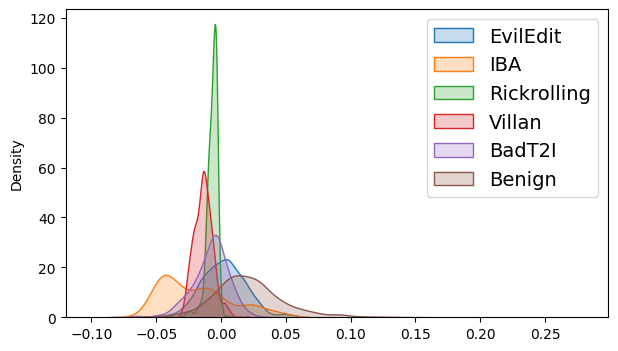

In [4]:
group_name = ['EvilEdit','IBA','Rickrolling','Villan','BadT2I']

all_benign_values = []
plt.figure(figsize=(7, 4))

for i in range(len(group_name)):
    all_backdoor_values = []
    
    backdoor_method = '../data/Metrics/train/'+group_name[i]
    backdoor_ids = os.listdir(backdoor_method)
    for backdoor_id in backdoor_ids:
        file_list = os.path.join(backdoor_method, backdoor_id)
        files_path = os.listdir(file_list)
        files_path_sorted = sorted(files_path, key=lambda x: int(''.join(filter(str.isdigit, x))))
        for file in files_path_sorted:
            value=0
            idx = int(file.split(".")[0].split("_")[-1])
            file_name = os.path.join(file_list,file)
            metrics = np.load(file_name, allow_pickle=True).item()
            if idx > 374: # Benign Samples
                value += metrics['delta_A_eos'][2] - metrics['delta_A_mean'][2]
                value += metrics['delta_A_eos'][3] - metrics['delta_A_mean'][3]
                value += metrics['delta_A_eos'][4] - metrics['delta_A_mean'][4]
                all_benign_values.append(value)
                continue
            value += metrics['delta_A_eos'][2] - metrics['delta_A_mean'][2]
            value += metrics['delta_A_eos'][3] - metrics['delta_A_mean'][3]
            value += metrics['delta_A_eos'][4] - metrics['delta_A_mean'][4]

            if file_name[1:] not in samples:
                continue
            all_backdoor_values.append(value)
            
    sns.kdeplot(all_backdoor_values, fill=True, label=group_name[i])
        
sns.kdeplot(all_benign_values, fill=True, label='Benign')

plt.legend(loc="upper right", fontsize=14)

# plt.savefig('./DAA-IND_distribution.pdf')
plt.show()  

## Metric 2: Dynamical System-based Approach (DAA-S)

Inspired by the $\text{DAA-I}$, we refine the Evolve Rate (ER) of each map by:
\begin{equation}
\Delta x_i(t)=x_i(t+1)-x_i(t).
\tag{4}
\end{equation}

Then, the metric for $\text{DAA-S}$ is defined by:
\begin{equation}
        \text{DAA-S}^t_s 
        = \sum_{j=t}^{t+s}[\Delta x_L(j) - \Delta \overline{x(j)}]\\
        = \sum_{j=t}^{t+s}[\Delta x_L(j)- \frac{1}{L-1} \sum_{i=1}^{L-1}\Delta x_i(j)],
        \tag{5}
\end{equation}
where $t$ is the start time step, with $ s $ denoting the time span. By setting a threshold $\alpha_G \in \mathbb{R}^1$, we can distinguish the backdoor samples by:
\begin{equation}
    \text{DAA-S}(P) = \mathbb{I}[\text{DAA-S}^t_s\leqslant \alpha_G].
    \tag{6}
\end{equation}

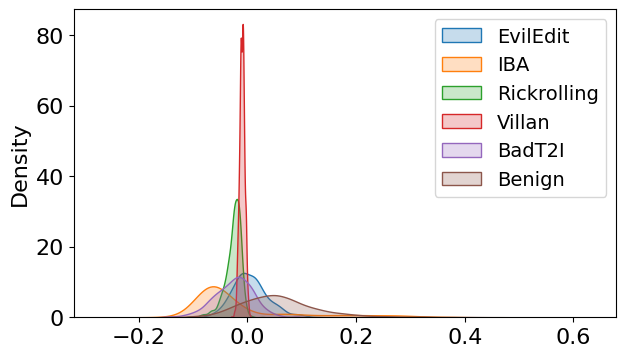

In [5]:
group_name = ['EvilEdit','IBA','Rickrolling','Villan','BadT2I']

plt.figure(figsize=(7, 4))
plt.rcParams.update({'font.size': 16})

all_benign_values = []

for i in range(len(group_name)):
    all_backdoor_values = []

    backdoor_method = '../data/Metrics/train/'+group_name[i]
    backdoor_ids = os.listdir(backdoor_method)
    for backdoor_id in backdoor_ids:
        file_list = os.path.join(backdoor_method, backdoor_id)
        files_path = os.listdir(file_list)
        files_path_sorted = sorted(files_path, key=lambda x: int(''.join(filter(str.isdigit, x))))
        for file in files_path_sorted:
            value = 0
            idx = int(file.split(".")[0].split("_")[-1])
            file_name = os.path.join(file_list,file)
            metrics = np.load(file_name, allow_pickle=True).item()
            if idx > 374: # Benign Samples
                value =  metrics['attention_node_trace'][1] + metrics['attention_node_trace'][2] + metrics['attention_node_trace'][3] + metrics['attention_node_trace'][4] + metrics['attention_node_trace'][5]
                all_benign_values.append(-value)
                continue
            if file_name[1:] not in samples:
                continue
            value =  metrics['attention_node_trace'][1] + metrics['attention_node_trace'][2] + metrics['attention_node_trace'][3] + metrics['attention_node_trace'][4] + metrics['attention_node_trace'][5]
            all_backdoor_values.append(-value)

    sns.kdeplot(all_backdoor_values, fill=True, label=group_name[i])

sns.kdeplot(all_benign_values, fill=True, label='Benign')

plt.legend(loc="upper right",fontsize=14)
# plt.savefig('./DAA-System_distribution.pdf')
plt.show()  